In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 보험 상품 유형, 가입자 성향 다시 분배
##### 가입 시기 나이 80세 이상인 고객을 현실성을 반영해 없애고 다시 반영을 한 것

In [2]:
data = pd.read_csv('C:/baf/data_with_new_products1022.csv')
df = data.copy() 

df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,individual_id,curr_ann_amt,days_tenure,cust_orig_date,date_of_birth,income,has_children,...,city,county,cust_orig_year,cust_orig_month,churn,tenure_years,age_at_orig,premium_to_income,policy_proxy_v2,strategy_type_final
0,0,0,0,2.213000e+11,818.877997,1454.0,2018-12-09,1978-06-23,22500.0,1,...,Kaufman,Kaufman,2018,2018-12,0,3.980835,40.0,0.036395,Variable Whole Life,혼합형
1,1,1,1,2.213001e+11,974.199182,1795.0,2018-01-02,1950-05-30,27500.0,0,...,Grand Prairie,Dallas,2018,2018-01,0,4.914442,67.0,0.035425,Variable Annuity,안정형
2,2,2,2,2.213007e+11,967.375112,4818.0,2009-09-23,1967-07-07,42500.0,0,...,Dallas,Dallas,2009,2009-09,0,13.190965,42.0,0.022762,Variable Universal Life,안정형
3,3,3,3,2.213016e+11,992.409561,130.0,2022-07-25,1969-05-25,125000.0,1,...,Arlington,Tarrant,2022,2022-07,1,0.355921,53.0,0.007939,Variable Universal Life,혼합형
4,4,4,4,2.213016e+11,784.633494,5896.0,2006-10-11,1972-09-25,87500.0,1,...,Fort Worth,Tarrant,2006,2006-10,0,16.142368,34.0,0.008967,Variable Whole Life,혼합형


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641992 entries, 0 to 1641991
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0.2         1641992 non-null  int64  
 1   Unnamed: 0.1         1641992 non-null  int64  
 2   Unnamed: 0           1641992 non-null  int64  
 3   individual_id        1641992 non-null  float64
 4   curr_ann_amt         1641992 non-null  float64
 5   days_tenure          1641992 non-null  float64
 6   cust_orig_date       1641992 non-null  object 
 7   date_of_birth        1641992 non-null  object 
 8   income               1641992 non-null  float64
 9   has_children         1641992 non-null  int64  
 10  length_of_residence  1641992 non-null  float64
 11  home_market_value    1641992 non-null  object 
 12  age_in_years         1641992 non-null  int64  
 13  home_owner           1641992 non-null  float64
 14  college_degree       1641992 non-null  float64
 15

### 좀 더 구체적이고 현실성있는 로직 기반으로 보험상품, 고객 유형을 부여하기 위해 데이터 분석 및 분포를 다시 진행해 파악

In [4]:
print("="*80)
print("【1】 기본 통계")
print("="*80)
print(f"총 고객 수: {len(df):,}명")
print(f"\n연령: 평균 {df['age_at_orig'].mean():.1f}세, "
      f"중위값 {df['age_at_orig'].median():.1f}세, "
      f"표준편차 {df['age_at_orig'].std():.1f}")
print(f"소득: 평균 ${df['income'].mean():,.0f}, "
      f"중위값 ${df['income'].median():,.0f}")
print(f"보험료: 평균 ${df['curr_ann_amt'].mean():,.0f}, "
      f"중위값 ${df['curr_ann_amt'].median():.0f}")
print(f"보험료/소득 비율: 평균 {df['premium_to_income'].mean():.3f} "
      f"(중위값 {df['premium_to_income'].median():.3f})")

print("\n" + "="*80)
print("【2】 연령대별 분포")
print("="*80)
age_dist = pd.cut(df['age_at_orig'], 
                  bins=[0, 30, 40, 50, 60, 80],
                  labels=['~29세', '30-39세', '40-49세', '50-59세', '60세+'])
print(age_dist.value_counts(normalize=True).sort_index().apply(lambda x: f"{x*100:5.1f}%"))

print("\n" + "="*80)
print("【3】 소득 5분위별 분포")
print("="*80)
income_q = pd.qcut(df['income'], q=5, 
                   labels=['Q1(하위20%)', 'Q2', 'Q3', 'Q4', 'Q5(상위20%)'])
print(income_q.value_counts(normalize=True).sort_index().apply(lambda x: f"{x*100:5.1f}%"))

print("\n" + "="*80)
print("【4】 가입 연도별 분포")
print("="*80)
year_dist = df['cust_orig_year'].value_counts().sort_index()
print(year_dist)
print(f"\n2005-2010: {df[df['cust_orig_year'].between(2005, 2010)].shape[0]:,}명 "
      f"({df[df['cust_orig_year'].between(2005, 2010)].shape[0]/len(df)*100:.1f}%)")
print(f"2011-2015: {df[df['cust_orig_year'].between(2011, 2015)].shape[0]:,}명 "
      f"({df[df['cust_orig_year'].between(2011, 2015)].shape[0]/len(df)*100:.1f}%)")
print(f"2016-2022: {df[df['cust_orig_year'].between(2016, 2022)].shape[0]:,}명 "
      f"({df[df['cust_orig_year'].between(2016, 2022)].shape[0]/len(df)*100:.1f}%)")

print("\n" + "="*80)
print("【5】 자녀 유무 × 연령대 교차표")
print("="*80)
cross_children = pd.crosstab(age_dist, df['has_children'], 
                             normalize='index') * 100
print(cross_children.round(1))

print("\n" + "="*80)
print("【6】 신용 상태 분포")
print("="*80)
print(f"신용 양호(1): {(df['good_credit']==1).sum():,}명 "
      f"({(df['good_credit']==1).sum()/len(df)*100:.1f}%)")
print(f"신용 불량(0): {(df['good_credit']==0).sum():,}명 "
      f"({(df['good_credit']==0).sum()/len(df)*100:.1f}%)")

print("\n" + "="*80)
print("【7】 보험료 부담 수준")
print("="*80)
print(df['premium_to_income'].describe())
print(f"고부담(>5%): {(df['premium_to_income']>0.05).sum()/len(df)*100:.1f}%")
print(f"중부담(2-5%): {df['premium_to_income'].between(0.02,0.05).sum()/len(df)*100:.1f}%")
print(f"저부담(<2%): {(df['premium_to_income']<0.02).sum()/len(df)*100:.1f}%")

print("\n" + "="*80)
print("【8】 해지율")
print("="*80)
print(f"전체 해지율: {df['churn'].mean()*100:.2f}%")
print(f"\n연령대별 해지율:")
print(pd.crosstab(age_dist, df['churn'], normalize='index')[1] * 100)

print("\n" + "="*80)
print("【9】 주요 변수 상관관계 (해지와의 관계)") 
print("="*80)
corr_vars = ['age_at_orig', 'income', 'curr_ann_amt', 'premium_to_income',
             'has_children', 'good_credit', 'length_of_residence','tenure_years', 'churn']
print(df[corr_vars].corr()['churn'].sort_values(ascending=False).round(3))

print("\n" + "="*80)
print("【10】 연령 × 소득 교차 분석")
print("="*80)
income_group = pd.cut(df['income'], 
                      bins=[0, 30000, 50000, 75000, 100000, 200000],
                      labels=['~3만', '3-5만', '5-7.5만', '7.5-10만', '10만+'])
print(pd.crosstab(age_dist, income_group, normalize='index') * 100)

【1】 기본 통계
총 고객 수: 1,641,992명

연령: 평균 44.9세, 중위값 44.0세, 표준편차 13.2
소득: 평균 $82,138, 중위값 $70,000
보험료: 평균 $940, 중위값 $935
보험료/소득 비율: 평균 0.019 (중위값 0.013)

【2】 연령대별 분포
age_at_orig
~29세       14.7%
30-39세     25.5%
40-49세     27.0%
50-59세     19.7%
60세+       13.1%
Name: proportion, dtype: object

【3】 소득 5분위별 분포
income
Q1(하위20%)     22.9%
Q2            19.8%
Q3            34.4%
Q4            14.9%
Q5(상위20%)      8.0%
Name: proportion, dtype: object

【4】 가입 연도별 분포
cust_orig_year
2005    498016
2006     42663
2007     45503
2008     47799
2009     48661
2010     49566
2011     50945
2012     48342
2013     56646
2014     59348
2015     61609
2016     67330
2017     75866
2018     80468
2019     85285
2020     66893
2021     37983
2022    219069
Name: count, dtype: int64

2005-2010: 732,208명 (44.6%)
2011-2015: 276,890명 (16.9%)
2016-2022: 632,894명 (38.5%)

【5】 자녀 유무 × 연령대 교차표
has_children     0     1
age_at_orig             
~29세          39.8  60.2
30-39세        38.0  62.0
40-49세        45.8  54.

# 위 분석 기반 로직 생성
##### 2005년 가입자는 498016명으로 비이상적으로 많은데, 2005년부터 기록한 보험으로 실제로는 누적 데이터일 가능성-> 2005년 이전은 '초기가입자'로 별도그룹화

## 로직 핵심 특징 

#### - 한국 시장 트렌드 반영
    # 2005년 = 초기 누적 데이터 (보수적)
    # 2006-2010 = 연금 중심기
    # 2011-2015 = 종신 확대기  
    # 2016-2022 = 유니버셜 급증기

In [5]:
def assign_insurance_products(df):
    # ========================================
    # STEP 1: 시기별 기본 확률 설정
    # ========================================
    
    # 한국 시장 트렌드 반영
    # 2005년 = 초기 누적 데이터 (보수적)
    # 2006-2010 = 연금 중심기
    # 2011-2015 = 종신 확대기  
    # 2016-2022 = 유니버셜 급증기
    
    period_ratios = {
        2005: {'연금': 0.55, '종신': 0.35, '유니버셜': 0.10},  # 초기 보수적
        2006: {'연금': 0.50, '종신': 0.35, '유니버셜': 0.15},
        2007: {'연금': 0.50, '종신': 0.35, '유니버셜': 0.15},
        2008: {'연금': 0.48, '종신': 0.35, '유니버셜': 0.17},
        2009: {'연금': 0.46, '종신': 0.36, '유니버셜': 0.18},
        2010: {'연금': 0.45, '종신': 0.36, '유니버셜': 0.19},
        2011: {'연금': 0.42, '종신': 0.38, '유니버셜': 0.20},
        2012: {'연금': 0.40, '종신': 0.40, '유니버셜': 0.20},
        2013: {'연금': 0.40, '종신': 0.40, '유니버셜': 0.20},
        2014: {'연금': 0.38, '종신': 0.40, '유니버셜': 0.22},
        2015: {'연금': 0.38, '종신': 0.39, '유니버셜': 0.23},
        2016: {'연금': 0.35, '종신': 0.37, '유니버셜': 0.28},
        2017: {'연금': 0.33, '종신': 0.35, '유니버셜': 0.32},
        2018: {'연금': 0.32, '종신': 0.33, '유니버셜': 0.35},
        2019: {'연금': 0.30, '종신': 0.32, '유니버셜': 0.38},
        2020: {'연금': 0.30, '종신': 0.30, '유니버셜': 0.40},
        2021: {'연금': 0.28, '종신': 0.30, '유니버셜': 0.42},
        2022: {'연금': 0.28, '종신': 0.28, '유니버셜': 0.44}
    }
    
    # ========================================
    # STEP 2: 고객별 상품 부여
    # ========================================
    
    products = []
    
    for idx, row in df.iterrows():
        age = row['age_at_orig']
        income = row['income']
        year = row['cust_orig_year']
        children = row['has_children']
        credit = row['good_credit']
        premium_ratio = row['premium_to_income']
        
        # 해당 연도 기본 확률
        base_prob = period_ratios.get(year, period_ratios[2022])
        
        # 고객 특성 기반 가중치 계산 (합 = 100)
        weight_annuity = base_prob['연금'] * 100
        weight_whole = base_prob['종신'] * 100
        weight_universal = base_prob['유니버셜'] * 100
        
        # 【규칙 1】 연령 조정
        if age >= 50:
            weight_annuity += 15  # 노후 준비
            weight_universal -= 10
            weight_whole -= 5
        elif age < 35:
            weight_universal += 15  # 젊은층 = 유연성
            weight_annuity -= 10
            weight_whole -= 5
        
        # 【규칙 2】 소득 조정 (저소득 유니버셜 제한 강화)
        if income >= 100000:  # 상위 10%
            weight_universal += 10  # 고소득 = 투자성
            weight_annuity -= 5
            weight_whole -= 5
        elif income < 40000:  # 하위 20%
            weight_whole += 18  # 저소득 = 보장 (강화)
            weight_universal -= 16  # 강력 제한 (강화)
            weight_annuity -= 2
        elif income < 50000:  # 하위 30%
            weight_whole += 10
            weight_universal -= 8
            weight_annuity -= 2
        
        # 【규칙 3】 자녀 & 연령 조합
        if children == 1 and 30 <= age <= 55:
            weight_whole += 10  # 사망보장 중요
            weight_annuity -= 5
            weight_universal -= 5
        
        # 【규칙 4】 신용 & 보험료 부담
        if credit == 1 and premium_ratio < 0.02:
            weight_universal += 5  # 여유로운 고객
            weight_annuity -= 3
            weight_whole -= 2
        
        # 음수 방지 (최소값 5)
        weight_annuity = max(5, weight_annuity)
        weight_whole = max(5, weight_whole)
        weight_universal = max(5, weight_universal)
        
        # 확률 정규화
        total = weight_annuity + weight_whole + weight_universal
        prob_annuity = weight_annuity / total
        prob_whole = weight_whole / total
        prob_universal = weight_universal / total
        
        # 확률 기반 샘플링
        product = np.random.choice(
            ['Variable Annuity', 'Variable Whole Life', 'Variable Universal Life'],
            p=[prob_annuity, prob_whole, prob_universal]
        )
        products.append(product)
        
        # 진행률 표시 (10만 건마다)
        if (idx + 1) % 100000 == 0:
            print(f"진행중... {idx+1:,} / {len(df):,} ({(idx+1)/len(df)*100:.1f}%)")
    
    return products

In [6]:
# 1. 상품 유형 부여
products = assign_insurance_products(df)

진행중... 100,000 / 1,641,992 (6.1%)
진행중... 200,000 / 1,641,992 (12.2%)
진행중... 300,000 / 1,641,992 (18.3%)
진행중... 400,000 / 1,641,992 (24.4%)
진행중... 500,000 / 1,641,992 (30.5%)
진행중... 600,000 / 1,641,992 (36.5%)
진행중... 700,000 / 1,641,992 (42.6%)
진행중... 800,000 / 1,641,992 (48.7%)
진행중... 900,000 / 1,641,992 (54.8%)
진행중... 1,000,000 / 1,641,992 (60.9%)
진행중... 1,100,000 / 1,641,992 (67.0%)
진행중... 1,200,000 / 1,641,992 (73.1%)
진행중... 1,300,000 / 1,641,992 (79.2%)
진행중... 1,400,000 / 1,641,992 (85.3%)
진행중... 1,500,000 / 1,641,992 (91.4%)
진행중... 1,600,000 / 1,641,992 (97.4%)


In [7]:
def assign_investment_strategy(df, products):

    strategies = []
    
    for idx, (row, product) in enumerate(zip(df.itertuples(), products)):
        age = row.age_at_orig
        income = row.income
        credit = row.good_credit
        premium_ratio = row.premium_to_income
        
        # 리스크 스코어 계산 (0~100)
        risk_score = 0
        
        # 【요소 1】 연령 (35점 배점) - 조정
        if age < 30:
            risk_score += 30
        elif age < 40:
            risk_score += 24
        elif age < 50:
            risk_score += 18
        elif age < 60:
            risk_score += 12
        else:
            risk_score += 6
        
        # 【요소 2】 소득 (25점 배점) - 조정
        if income >= 100000:
            risk_score += 25
        elif income >= 75000:
            risk_score += 20
        elif income >= 50000:
            risk_score += 15
        else:
            risk_score += 8
        
        # 【요소 3】 상품 유형 (15점 배점) - 약화
        if product == 'Variable Universal Life':
            risk_score += 12  # 투자 목적
        elif product == 'Variable Whole Life':
            risk_score += 8   # 중간
        else:  # Variable Annuity
            risk_score += 5   # 보수적
        
        # 【요소 4】 신용 & 부담률 (10점 배점)
        if credit == 1 and premium_ratio < 0.015:
            risk_score += 10  # 여유로움
        elif credit == 1:
            risk_score += 5
        
        # 【요소 5】 무작위 변동 추가 (±18점으로 확대)
        # 현실에서는 같은 조건이어도 성향이 다름
        risk_score += np.random.randint(-18, 19)
        risk_score = max(0, min(100, risk_score))  # 0-100 범위
        
        # 성향 분류 (목표: 공격 17%, 혼합 60%, 안정 23%)
        if risk_score >= 66:
            strategy = '공격형'
        elif risk_score >= 33:
            strategy = '혼합형'
        else:
            strategy = '안정형'
        
        strategies.append(strategy)
        
        # 진행률 표시
        if (idx + 1) % 100000 == 0:
            print(f"진행중... {idx+1:,} / {len(df):,} ({(idx+1)/len(df)*100:.1f}%)")
    
    return strategies

In [8]:
# 2. 투자 성향 부여
strategies = assign_investment_strategy(df, products)

진행중... 100,000 / 1,641,992 (6.1%)
진행중... 200,000 / 1,641,992 (12.2%)
진행중... 300,000 / 1,641,992 (18.3%)
진행중... 400,000 / 1,641,992 (24.4%)
진행중... 500,000 / 1,641,992 (30.5%)
진행중... 600,000 / 1,641,992 (36.5%)
진행중... 700,000 / 1,641,992 (42.6%)
진행중... 800,000 / 1,641,992 (48.7%)
진행중... 900,000 / 1,641,992 (54.8%)
진행중... 1,000,000 / 1,641,992 (60.9%)
진행중... 1,100,000 / 1,641,992 (67.0%)
진행중... 1,200,000 / 1,641,992 (73.1%)
진행중... 1,300,000 / 1,641,992 (79.2%)
진행중... 1,400,000 / 1,641,992 (85.3%)
진행중... 1,500,000 / 1,641,992 (91.4%)
진행중... 1,600,000 / 1,641,992 (97.4%)


In [9]:
df['policy_proxy_v2'] = products
df['strategy_type_final'] = strategies

In [10]:
def validate_assignment(df, products, strategies):
    print("\n" + "="*80)
    print("【검증】 상품 부여 결과")
    print("="*80)
    
    # 1. 상품 분포
    product_dist = pd.Series(products).value_counts(normalize=True) * 100
    print("\n1. 전체 상품 비율:")
    print(product_dist.round(1))
    
    # 2. 시기별 상품 분포
    print("\n2. 시기별 상품 분포:")
    period_df = df.copy()
    period_df['product'] = products
    
    period_df['period'] = pd.cut(
        period_df['cust_orig_year'],
        bins=[2004, 2005, 2010, 2015, 2022],
        labels=['2005년(초기)', '2006-2010', '2011-2015', '2016-2022']
    )
    
    period_cross = pd.crosstab(
        period_df['period'],
        period_df['product'],
        normalize='index'
    ) * 100
    print(period_cross.round(1))
    
    # 3. 투자 성향 분포
    print("\n3. 투자 성향 분포:")
    strategy_dist = pd.Series(strategies).value_counts(normalize=True) * 100
    print(strategy_dist.round(1))
    
    # 4. 상품 × 성향 교차표
    print("\n4. 상품별 투자 성향 분포:")
    cross_tab = pd.crosstab(
        products,
        strategies,
        normalize='index'
    ) * 100
    print(cross_tab.round(1))
    
    # 5. 연령대별 상품 분포
    print("\n5. 연령대별 상품 분포:")
    age_group = pd.cut(
        df['age_at_orig'],
        bins=[0, 30, 40, 50, 60, 80],
        labels=['~29세', '30-39세', '40-49세', '50-59세', '60세+']
    )
    age_cross = pd.crosstab(age_group, products, normalize='index') * 100
    print(age_cross.round(1))
    
    print("\n" + "="*80)
    print("검증 완료. 비현실적 조합 확인:")
    print("="*80)
    
    # 6. 이상 조합 체크
    df_check = df.copy()
    df_check['product'] = products
    df_check['strategy'] = strategies
    
    # 예: 60세 이상 + 유니버셜 + 공격형 = 비현실적
    weird1 = df_check[
        (df_check['age_at_orig'] >= 60) &
        (df_check['product'] == 'Variable Universal Life') &
        (df_check['strategy'] == '공격형')
    ]
    print(f"• 60세+ & 유니버셜 & 공격형: {len(weird1):,}명 ({len(weird1)/len(df)*100:.2f}%)")
    
    # 예: 저소득 + 유니버셜
    weird2 = df_check[
        (df_check['income'] < 40000) &
        (df_check['product'] == 'Variable Universal Life')
    ]
    print(f"• 저소득(<4만) & 유니버셜: {len(weird2):,}명 ({len(weird2)/len(df)*100:.2f}%)")
    
    print("\n→ 위 비율이 2% 미만이면 양호합니다.")

In [11]:
# 3. 검증
validate_assignment(df, products, strategies)


【검증】 상품 부여 결과

1. 전체 상품 비율:
Variable Annuity           38.2
Variable Whole Life        36.4
Variable Universal Life    25.3
Name: proportion, dtype: float64

2. 시기별 상품 분포:
product    Variable Annuity  Variable Universal Life  Variable Whole Life
period                                                                   
2005년(초기)              50.9                     13.3                 35.8
2006-2010              40.0                     22.3                 37.7
2011-2015              34.1                     24.4                 41.6
2016-2022              29.5                     36.4                 34.2

3. 투자 성향 분포:
혼합형    66.0
공격형    17.6
안정형    16.4
Name: proportion, dtype: float64

4. 상품별 투자 성향 분포:
col_0                     공격형   안정형   혼합형
row_0                                    
Variable Annuity         10.4  23.0  66.6
Variable Universal Life  32.0   5.1  62.9
Variable Whole Life      15.1  17.3  67.7

5. 연령대별 상품 분포:
col_0        Variable Annuity  Variable Universal Life  

In [12]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,individual_id,curr_ann_amt,days_tenure,cust_orig_date,date_of_birth,income,has_children,...,city,county,cust_orig_year,cust_orig_month,churn,tenure_years,age_at_orig,premium_to_income,policy_proxy_v2,strategy_type_final
0,0,0,0,2.213000e+11,818.877997,1454.0,2018-12-09,1978-06-23,22500.0,1,...,Kaufman,Kaufman,2018,2018-12,0,3.980835,40.0,0.036395,Variable Whole Life,혼합형
1,1,1,1,2.213001e+11,974.199182,1795.0,2018-01-02,1950-05-30,27500.0,0,...,Grand Prairie,Dallas,2018,2018-01,0,4.914442,67.0,0.035425,Variable Annuity,안정형
2,2,2,2,2.213007e+11,967.375112,4818.0,2009-09-23,1967-07-07,42500.0,0,...,Dallas,Dallas,2009,2009-09,0,13.190965,42.0,0.022762,Variable Annuity,혼합형
3,3,3,3,2.213016e+11,992.409561,130.0,2022-07-25,1969-05-25,125000.0,1,...,Arlington,Tarrant,2022,2022-07,1,0.355921,53.0,0.007939,Variable Annuity,혼합형
4,4,4,4,2.213016e+11,784.633494,5896.0,2006-10-11,1972-09-25,87500.0,1,...,Fort Worth,Tarrant,2006,2006-10,0,16.142368,34.0,0.008967,Variable Universal Life,공격형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641987,1641987,1668789,1668789,2.213007e+11,1259.900413,803.0,2020-09-20,1967-07-07,27500.0,1,...,Dallas,Dallas,2020,2020-09,0,2.198494,53.0,0.045815,Variable Annuity,혼합형
1641988,1641988,1668790,1668790,2.213015e+11,604.096865,3261.0,2013-12-28,1945-07-01,87500.0,0,...,Richardson,Dallas,2013,2013-12,0,8.928131,68.0,0.006904,Variable Annuity,혼합형
1641989,1641989,1668791,1668791,2.213026e+11,1255.570597,3403.0,2013-08-08,1981-09-22,125000.0,0,...,Rowlett,Dallas,2013,2013-08,0,9.316906,31.0,0.010045,Variable Annuity,공격형
1641990,1641990,1668792,1668792,2.213008e+11,1104.105051,1258.0,2019-06-23,1970-07-26,87500.0,1,...,Keller,Tarrant,2019,2019-06,0,3.444216,48.0,0.012618,Variable Universal Life,혼합형


## 데이터

### 1. GDP

In [13]:
import pandas as pd
gdp = pd.read_csv('C:/Users/qkrrl/baf/GDP.csv')
print(gdp.head())
print(gdp.tail())

  observation_date        GDP
0       2005-01-01  12767.286
1       2005-04-01  12922.656
2       2005-07-01  13142.642
3       2005-10-01  13324.204
4       2006-01-01   13599.16
   observation_date        GDP
78       2024-07-01  29374.914
79       2024-10-01  29723.864
80       2025-01-01  29962.047
81       2025-04-01  30353.902
82       2025-07-01  30,504.50


### 2. 실업률

In [14]:
import pandas as pd
unrate = pd.read_csv('C:/Users/qkrrl/baf/UNRATE.csv')
print(unrate.head())

  observation_date  UNRATE
0       2005-01-01     5.3
1       2005-02-01     5.4
2       2005-03-01     5.2
3       2005-04-01     5.2
4       2005-05-01     5.1


### 3. 물가지수

In [15]:
import pandas as pd
cpi = pd.read_csv('C:/Users/qkrrl/baf/CPIAUCSL.csv')
print(cpi.head())
print(cpi.tail())

  observation_date  CPIAUCSL
0       2005-01-01     191.6
1       2005-02-01     192.4
2       2005-03-01     193.1
3       2005-04-01     193.7
4       2005-05-01     193.6
    observation_date  CPIAUCSL
243       2025-04-01   320.321
244       2025-05-01   320.580
245       2025-06-01   321.500
246       2025-07-01   322.132
247       2025-08-01   323.364


### 4. 시장금리

In [16]:
dgs10 = pd.read_csv('C:/Users/qkrrl/baf/DGS10.csv')
print(dgs10.head())
print(dgs10.tail())

  observation_date  DGS10
0       2005-01-03   4.23
1       2005-01-04   4.29
2       2005-01-05   4.29
3       2005-01-06   4.29
4       2005-01-07   4.29
     observation_date  DGS10
5399       2025-09-12   4.06
5400       2025-09-15   4.05
5401       2025-09-16   4.04
5402       2025-09-17   4.06
5403       2025-09-18   4.11


### 5. S&P500

In [17]:
import yfinance as yf
sp500_data = yf.download('^GSPC', start='2005-01-01')
print(sp500_data.head())
print(sp500_data.tail())

C:\Users\qkrrl\AppData\Local\Temp\ipykernel_17540\2280022811.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download('^GSPC', start='2005-01-01')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2005-01-03  1202.079956  1217.800049  1200.319946  1211.920044  1510800000
2005-01-04  1188.050049  1205.839966  1185.390015  1202.079956  1721000000
2005-01-05  1183.739990  1192.729980  1183.719971  1188.050049  1738900000
2005-01-06  1187.890015  1191.630005  1183.270020  1183.739990  1569100000
2005-01-07  1186.189941  1192.199951  1182.160034  1187.890015  1477900000
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-10-27  6875.160156  6877.279785  6843.939941  6845.459961  5290650000
2025-10-28  6890.890137  6911.299805  6870.729980  6897.740234  5695930000
2025-10-29  6890.589844  

## 데이터 결합

#### 1. 가입시점에 각 경제변수 데이터 결합
#### 2. 관찰시점 (2022-12-02) 이전 한달 전의 각 경제변수 데이터 결합

##### 1. 경제변수 통합 데이터 생성 

In [18]:
# GDP (분기 → 월별)
gdp['observation_date'] = pd.to_datetime(gdp['observation_date'])
gdp['month'] = gdp['observation_date'].dt.to_period('M').dt.to_timestamp()
gdp_monthly = gdp.set_index('month')[['GDP']].resample('MS').ffill().reset_index()
print(gdp_monthly.head())

       month        GDP
0 2005-01-01  12767.286
1 2005-02-01  12767.286
2 2005-03-01  12767.286
3 2005-04-01  12922.656
4 2005-05-01  12922.656


In [19]:
# S&P500 데이터의 종가 기준 평균 -> 월별 데이터 생성
import yfinance as yf
import pandas as pd

# 1. 데이터 다운로드
sp500_data = yf.download('^GSPC', start='2005-01-01')

# 2. 멀티인덱스 → 단일 문자열 컬럼으로 변환
sp500_data.columns = [col if isinstance(col, str) else col[0] for col in sp500_data.columns]

# 3. 날짜 인덱스를 월 단위로 변환
sp500_data['month'] = sp500_data.index.to_period('M').to_timestamp()

# 4. 월별 평균 종가 계산
sp500_monthly = sp500_data.groupby('month')[['Close']].mean().reset_index()
sp500_monthly.rename(columns={'Close': 'sp500'}, inplace=True)

# 결과 확인
print(sp500_monthly.head())

C:\Users\qkrrl\AppData\Local\Temp\ipykernel_17540\1889909629.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download('^GSPC', start='2005-01-01')
[*********************100%***********************]  1 of 1 completed

       month        sp500
0 2005-01-01  1181.407996
1 2005-02-01  1199.626844
2 2005-03-01  1194.897727
3 2005-04-01  1164.427612
4 2005-05-01  1178.275716


In [20]:
# 날짜 → 월로 변환 (timestamp: 2005-01-01 형식으로 유지)
# DGS10
dgs10['observation_date'] = pd.to_datetime(dgs10['observation_date'])
dgs10['month'] = dgs10['observation_date'].dt.to_period('M').dt.to_timestamp()

# CPI
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
cpi['month'] = cpi['observation_date'].dt.to_period('M').dt.to_timestamp()

# UNRATE
unrate['observation_date'] = pd.to_datetime(unrate['observation_date'])
unrate['month'] = unrate['observation_date'].dt.to_period('M').dt.to_timestamp()

In [21]:
dgs10['observation_date'] = pd.to_datetime(dgs10['observation_date'])
dgs10['month'] = dgs10['observation_date'].dt.to_period('M').dt.to_timestamp()

dgs10_monthly = (
    dgs10
    .groupby('month', as_index=False)['DGS10']
    .mean()
)

In [22]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,individual_id,curr_ann_amt,days_tenure,cust_orig_date,date_of_birth,income,has_children,...,city,county,cust_orig_year,cust_orig_month,churn,tenure_years,age_at_orig,premium_to_income,policy_proxy_v2,strategy_type_final
0,0,0,0,2.213000e+11,818.877997,1454.0,2018-12-09,1978-06-23,22500.0,1,...,Kaufman,Kaufman,2018,2018-12,0,3.980835,40.0,0.036395,Variable Whole Life,혼합형
1,1,1,1,2.213001e+11,974.199182,1795.0,2018-01-02,1950-05-30,27500.0,0,...,Grand Prairie,Dallas,2018,2018-01,0,4.914442,67.0,0.035425,Variable Annuity,안정형
2,2,2,2,2.213007e+11,967.375112,4818.0,2009-09-23,1967-07-07,42500.0,0,...,Dallas,Dallas,2009,2009-09,0,13.190965,42.0,0.022762,Variable Annuity,혼합형
3,3,3,3,2.213016e+11,992.409561,130.0,2022-07-25,1969-05-25,125000.0,1,...,Arlington,Tarrant,2022,2022-07,1,0.355921,53.0,0.007939,Variable Annuity,혼합형
4,4,4,4,2.213016e+11,784.633494,5896.0,2006-10-11,1972-09-25,87500.0,1,...,Fort Worth,Tarrant,2006,2006-10,0,16.142368,34.0,0.008967,Variable Universal Life,공격형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641987,1641987,1668789,1668789,2.213007e+11,1259.900413,803.0,2020-09-20,1967-07-07,27500.0,1,...,Dallas,Dallas,2020,2020-09,0,2.198494,53.0,0.045815,Variable Annuity,혼합형
1641988,1641988,1668790,1668790,2.213015e+11,604.096865,3261.0,2013-12-28,1945-07-01,87500.0,0,...,Richardson,Dallas,2013,2013-12,0,8.928131,68.0,0.006904,Variable Annuity,혼합형
1641989,1641989,1668791,1668791,2.213026e+11,1255.570597,3403.0,2013-08-08,1981-09-22,125000.0,0,...,Rowlett,Dallas,2013,2013-08,0,9.316906,31.0,0.010045,Variable Annuity,공격형
1641990,1641990,1668792,1668792,2.213008e+11,1104.105051,1258.0,2019-06-23,1970-07-26,87500.0,1,...,Keller,Tarrant,2019,2019-06,0,3.444216,48.0,0.012618,Variable Universal Life,혼합형


#### 2. 매핑

In [23]:
# ----------------------------------------------------------
# 1️⃣ 월 단위 평균 (이미 월별로 만든 경제지표 포함)
# ----------------------------------------------------------
def monthly_avg(df, value_col):
    df['month'] = pd.to_datetime(df['month'])
    return df.groupby('month', as_index=False)[value_col].mean()

dgs10_monthly  = monthly_avg(dgs10, 'DGS10')
cpi_monthly    = monthly_avg(cpi, 'CPIAUCSL')
unrate_monthly = monthly_avg(unrate, 'UNRATE')
# GDP, SP500은 이미 월별로 처리됨 (gdp_monthly, sp500_monthly)

# ----------------------------------------------------------
# 2️⃣ 모든 월별 경제지표 병합
# ----------------------------------------------------------
econ_data = (
    gdp_monthly
    .merge(dgs10_monthly, on='month', how='outer')
    .merge(cpi_monthly, on='month', how='outer')
    .merge(unrate_monthly, on='month', how='outer')
    .merge(sp500_monthly, on='month', how='outer')
    .sort_values('month')
    .reset_index(drop=True)
)

print(econ_data.head())  # 확인

       month        GDP     DGS10  CPIAUCSL  UNRATE        sp500
0 2005-01-01  12767.286  4.221500     191.6     5.3  1181.407996
1 2005-02-01  12767.286  4.165263     192.4     5.4  1199.626844
2 2005-03-01  12767.286  4.497727     193.1     5.2  1194.897727
3 2005-04-01  12922.656  4.340952     193.7     5.2  1164.427612
4 2005-05-01  12922.656  4.144286     193.6     5.1  1178.275716


In [24]:
# ----------------------------------------------------------
# 0️⃣ churn 및 타입 정리
# ----------------------------------------------------------
df['churn'] = pd.to_numeric(df['churn'], errors='coerce').fillna(0).astype(int)
df['cust_orig_date'] = pd.to_datetime(df['cust_orig_date'], errors='coerce')
df['days_tenure'] = pd.to_numeric(df['days_tenure'], errors='coerce')

# 경제변수도 숫자형으로 정리
for c in ['GDP', 'DGS10', 'CPIAUCSL', 'UNRATE', 'sp500']:
    econ_data[c] = pd.to_numeric(econ_data[c], errors='coerce')

# ----------------------------------------------------------
# 1️⃣ 관찰월 계산 (가입일 + days_tenure 일)
# ----------------------------------------------------------
df['churn_ref_month'] = (
    (df['cust_orig_date'] + pd.to_timedelta(df['days_tenure'].fillna(0), unit='D'))
    .dt.to_period('M').dt.to_timestamp()
)

# ----------------------------------------------------------
# 2️⃣ 관찰월 기준 경제변수 매핑
# ----------------------------------------------------------
df_ref = df.merge(
    econ_data.rename(columns={
        'GDP': 'GDP_ref',
        'DGS10': 'DGS10_ref',
        'CPIAUCSL': 'CPIAUCSL_ref',
        'UNRATE': 'UNRATE_ref',
        'sp500': 'sp500_ref'
    }),
    left_on='churn_ref_month',
    right_on='month',
    how='left'
).drop(columns=['month'])

# ----------------------------------------------------------
# 3️⃣ 2022-11 값 확보 (churn==0용)
# ----------------------------------------------------------
target_month = pd.Timestamp('2022-11-01')
econ_2022_11 = econ_data.loc[econ_data['month'] == target_month].iloc[0]

# ----------------------------------------------------------
# 4️⃣ 조건별로 값 대입
# ----------------------------------------------------------
rename_short = {
    'GDP': 'gdp',
    'DGS10': 'dgs10',
    'CPIAUCSL': 'cpi',
    'UNRATE': 'unrate',
    'sp500': 'sp500'
}

for var, short in rename_short.items():
    out_col = f'{short}_2022_11'
    ref_col = f'{var}_ref'
    df_ref[out_col] = np.nan
    df_ref[out_col] = df_ref[out_col].astype(float)

    # churn==1 → 관찰월 값
    df_ref.loc[df_ref['churn'] == 1, out_col] = df_ref.loc[df_ref['churn'] == 1, ref_col]

    # churn==0 → 2022-11 고정값
    df_ref.loc[df_ref['churn'] == 0, out_col] = float(econ_2022_11[var])

# ----------------------------------------------------------
# 5️⃣ 불필요한 중간 컬럼 정리
# ----------------------------------------------------------
df = df_ref.drop(columns=[f'{v}_ref' for v in ['GDP','DGS10','CPIAUCSL','UNRATE','sp500']], errors='ignore')

# ----------------------------------------------------------
# 6️⃣ 검증용 출력
# ----------------------------------------------------------
check_cols = [
    'cust_orig_date', 'days_tenure', 'churn', 'churn_ref_month',
    'gdp_2022_11', 'dgs10_2022_11', 'cpi_2022_11', 'unrate_2022_11', 'sp500_2022_11'
]
print(df[check_cols].head())

  cust_orig_date  days_tenure  churn churn_ref_month  gdp_2022_11  \
0     2018-12-09       1454.0      0      2022-12-01    26734.277   
1     2018-01-02       1795.0      0      2022-12-01    26734.277   
2     2009-09-23       4818.0      0      2022-12-01    26734.277   
3     2022-07-25        130.0      1      2022-12-01    26734.277   
4     2006-10-11       5896.0      0      2022-12-01    26734.277   

   dgs10_2022_11  cpi_2022_11  unrate_2022_11  sp500_2022_11  
0        3.89100      298.708             3.6    3917.488595  
1        3.89100      298.708             3.6    3917.488595  
2        3.89100      298.708             3.6    3917.488595  
3        3.61619      298.808             3.5    3912.380952  
4        3.89100      298.708             3.6    3917.488595  


In [25]:
df.groupby('churn')[['gdp_2022_11', 'dgs10_2022_11', 
                     'cpi_2022_11', 'unrate_2022_11', 'sp500_2022_11']].describe()

gdp_2022_11                                                            \
            count       mean           std        min        25%        50%   
churn                                                                         
0       1452712.0  26734.277  1.236913e-10  26734.277  26734.277  26734.277   
1        189280.0  26734.277  0.000000e+00  26734.277  26734.277  26734.277   

                            dgs10_2022_11           ... unrate_2022_11       \
             75%        max         count     mean  ...            75%  max   
churn                                               ...                       
0      26734.277  26734.277     1452712.0  3.89100  ...            3.6  3.6   
1      26734.277  26734.277      189280.0  3.61619  ...            3.5  3.5   

      sp500_2022_11                                                       \
              count         mean           std          min          25%   
churn                                                                      
0         1452712.0  3917.488595  4.547475e-13  3917.488595  3917.488595   
1          189280.0  3912.380952  0.000000e+00  3912.380952  3912.380952   

                                              
               50%          75%          max  
churn                                         
0      3917.488595  3917.488595  3917.488595  
1      3912.380952  3912.380952  3912.380952  

[2 rows x 40 columns]

In [26]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,individual_id,curr_ann_amt,days_tenure,cust_orig_date,date_of_birth,income,has_children,...,age_at_orig,premium_to_income,policy_proxy_v2,strategy_type_final,churn_ref_month,gdp_2022_11,dgs10_2022_11,cpi_2022_11,unrate_2022_11,sp500_2022_11
0,0,0,0,2.213000e+11,818.877997,1454.0,2018-12-09,1978-06-23,22500.0,1,...,40.0,0.036395,Variable Whole Life,혼합형,2022-12-01,26734.277,3.89100,298.708,3.6,3917.488595
1,1,1,1,2.213001e+11,974.199182,1795.0,2018-01-02,1950-05-30,27500.0,0,...,67.0,0.035425,Variable Annuity,안정형,2022-12-01,26734.277,3.89100,298.708,3.6,3917.488595
2,2,2,2,2.213007e+11,967.375112,4818.0,2009-09-23,1967-07-07,42500.0,0,...,42.0,0.022762,Variable Annuity,혼합형,2022-12-01,26734.277,3.89100,298.708,3.6,3917.488595
3,3,3,3,2.213016e+11,992.409561,130.0,2022-07-25,1969-05-25,125000.0,1,...,53.0,0.007939,Variable Annuity,혼합형,2022-12-01,26734.277,3.61619,298.808,3.5,3912.380952
4,4,4,4,2.213016e+11,784.633494,5896.0,2006-10-11,1972-09-25,87500.0,1,...,34.0,0.008967,Variable Universal Life,공격형,2022-12-01,26734.277,3.89100,298.708,3.6,3917.488595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641987,1641987,1668789,1668789,2.213007e+11,1259.900413,803.0,2020-09-20,1967-07-07,27500.0,1,...,53.0,0.045815,Variable Annuity,혼합형,2022-12-01,26734.277,3.89100,298.708,3.6,3917.488595
1641988,1641988,1668790,1668790,2.213015e+11,604.096865,3261.0,2013-12-28,1945-07-01,87500.0,0,...,68.0,0.006904,Variable Annuity,혼합형,2022-12-01,26734.277,3.89100,298.708,3.6,3917.488595
1641989,1641989,1668791,1668791,2.213026e+11,1255.570597,3403.0,2013-08-08,1981-09-22,125000.0,0,...,31.0,0.010045,Variable Annuity,공격형,2022-12-01,26734.277,3.89100,298.708,3.6,3917.488595
1641990,1641990,1668792,1668792,2.213008e+11,1104.105051,1258.0,2019-06-23,1970-07-26,87500.0,1,...,48.0,0.012618,Variable Universal Life,혼합형,2022-12-01,26734.277,3.89100,298.708,3.6,3917.488595


In [27]:
# 모든 열 이름 
print(df.columns.tolist())

# 각 열 한 줄씩 보기 -> []내의 변수확인
for col in df.columns:
    print(col)

# 열 이름 + 타입
print(df.dtypes)

['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'individual_id', 'curr_ann_amt', 'days_tenure', 'cust_orig_date', 'date_of_birth', 'income', 'has_children', 'length_of_residence', 'home_market_value', 'age_in_years', 'home_owner', 'college_degree', 'good_credit', 'city', 'county', 'cust_orig_year', 'cust_orig_month', 'churn', 'tenure_years', 'age_at_orig', 'premium_to_income', 'policy_proxy_v2', 'strategy_type_final', 'churn_ref_month', 'gdp_2022_11', 'dgs10_2022_11', 'cpi_2022_11', 'unrate_2022_11', 'sp500_2022_11']
Unnamed: 0.2
Unnamed: 0.1
Unnamed: 0
individual_id
curr_ann_amt
days_tenure
cust_orig_date
date_of_birth
income
has_children
length_of_residence
home_market_value
age_in_years
home_owner
college_degree
good_credit
city
county
cust_orig_year
cust_orig_month
churn
tenure_years
age_at_orig
premium_to_income
policy_proxy_v2
strategy_type_final
churn_ref_month
gdp_2022_11
dgs10_2022_11
cpi_2022_11
unrate_2022_11
sp500_2022_11
Unnamed: 0.2                    int64
Unnamed: 0.1   

In [28]:
# 예시: 삭제 고려 중인 열 5개만 확인
columns_to_check = ['cust_orig_date']
df = df.drop(columns=columns_to_check, errors='ignore')

# 앞 5행만 보기
print(df.head())
print(df.tail())

   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  individual_id  curr_ann_amt  \
0             0             0           0   2.213000e+11    818.877997   
1             1             1           1   2.213001e+11    974.199182   
2             2             2           2   2.213007e+11    967.375112   
3             3             3           3   2.213016e+11    992.409561   
4             4             4           4   2.213016e+11    784.633494   

   days_tenure date_of_birth    income  has_children  length_of_residence  \
0       1454.0    1978-06-23   22500.0             1                 15.0   
1       1795.0    1950-05-30   27500.0             0                  2.0   
2       4818.0    1967-07-07   42500.0             0                 10.0   
3        130.0    1969-05-25  125000.0             1                  6.0   
4       5896.0    1972-09-25   87500.0             1                  4.0   

   ... age_at_orig  premium_to_income          policy_proxy_v2  \
0  ...        40.0        

In [29]:
df['cust_orig_year'].value_counts()

cust_orig_year
2005    498016
2022    219069
2019     85285
2018     80468
2017     75866
2016     67330
2020     66893
2015     61609
2014     59348
2013     56646
2011     50945
2010     49566
2009     48661
2012     48342
2008     47799
2007     45503
2006     42663
2021     37983
Name: count, dtype: int64

In [30]:
# ----------------------------------------------------------
# 🔧 1️⃣ 타입 정리
# ----------------------------------------------------------
df['cust_orig_month'] = pd.to_datetime(df['cust_orig_month'], errors='coerce')
for c in ['GDP', 'DGS10', 'CPIAUCSL', 'UNRATE', 'sp500']:
    econ_data[c] = pd.to_numeric(econ_data[c], errors='coerce')

# ----------------------------------------------------------
# 2️⃣ 가입월(cust_orig_month) 기준 경제변수 매핑
# ----------------------------------------------------------
df = df.merge(
    econ_data.rename(columns={
        'GDP': 'gdp_at_orig',
        'DGS10': 'dgs10_at_orig',
        'CPIAUCSL': 'cpi_at_orig',
        'UNRATE': 'unrate_at_orig',
        'sp500': 'sp500_at_orig'
    }),
    left_on='cust_orig_month',
    right_on='month',
    how='left'
).drop(columns=['month'], errors='ignore')

# ----------------------------------------------------------
# 3️⃣ 결과 확인
# ----------------------------------------------------------
check_cols = [
    'cust_orig_month',
    'gdp_at_orig', 'dgs10_at_orig', 'cpi_at_orig', 'unrate_at_orig', 'sp500_at_orig',
    'gdp_2022_11', 'dgs10_2022_11', 'cpi_2022_11', 'unrate_2022_11', 'sp500_2022_11'
]

print(df[check_cols].head())

  cust_orig_month  gdp_at_orig  dgs10_at_orig  cpi_at_orig  unrate_at_orig  \
0      2018-12-01    20917.867       2.832632      252.767             3.9   
1      2018-01-01    20328.553       2.583810      248.859             4.0   
2      2009-09-01    14448.882       3.401905      215.861             9.8   
3      2022-07-01    26272.011       2.896000      294.940             3.5   
4      2006-10-01    14039.560       4.729048      201.900             4.4   

   sp500_at_orig  gdp_2022_11  dgs10_2022_11  cpi_2022_11  unrate_2022_11  \
0    2567.307386    26734.277        3.89100      298.708             3.6   
1    2789.803816    26734.277        3.89100      298.708             3.6   
2    1044.552383    26734.277        3.89100      298.708             3.6   
3    3911.729492    26734.277        3.61619      298.808             3.5   
4    1363.377264    26734.277        3.89100      298.708             3.6   

   sp500_2022_11  
0    3917.488595  
1    3917.488595  
2    3917.4

In [31]:
df[df.columns[df.isna().any()]].head()

""
0
1
2
3
4


In [32]:
df.count()

Unnamed: 0.2           1641992
Unnamed: 0.1           1641992
Unnamed: 0             1641992
individual_id          1641992
curr_ann_amt           1641992
days_tenure            1641992
date_of_birth          1641992
income                 1641992
has_children           1641992
length_of_residence    1641992
home_market_value      1641992
age_in_years           1641992
home_owner             1641992
college_degree         1641992
good_credit            1641992
city                   1641992
county                 1641992
cust_orig_year         1641992
cust_orig_month        1641992
churn                  1641992
tenure_years           1641992
age_at_orig            1641992
premium_to_income      1641992
policy_proxy_v2        1641992
strategy_type_final    1641992
churn_ref_month        1641992
gdp_2022_11            1641992
dgs10_2022_11          1641992
cpi_2022_11            1641992
unrate_2022_11         1641992
sp500_2022_11          1641992
gdp_at_orig            1641992
dgs10_at

In [33]:
# 불필요한 열 제거
# 🔧 여기 리스트에 삭제하고 싶은 열 이름만 추가
cols_to_drop = [
    'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1','churn_ref_month',
    'city','county','Unnamed: 0.2'
    ]

# 오류 없이 삭제 (존재하지 않는 열은 무시)
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 결과 확인
print(f"삭제 완료 ✅ (현재 열 개수: {len(df.columns)})")
print("남은 주요 열 예시:", df.columns[:15].tolist())

삭제 완료 ✅ (현재 열 개수: 30)
남은 주요 열 예시: ['individual_id', 'curr_ann_amt', 'days_tenure', 'date_of_birth', 'income', 'has_children', 'length_of_residence', 'home_market_value', 'age_in_years', 'home_owner', 'college_degree', 'good_credit', 'cust_orig_year', 'cust_orig_month', 'churn']


In [34]:
df.count()

individual_id          1641992
curr_ann_amt           1641992
days_tenure            1641992
date_of_birth          1641992
income                 1641992
has_children           1641992
length_of_residence    1641992
home_market_value      1641992
age_in_years           1641992
home_owner             1641992
college_degree         1641992
good_credit            1641992
cust_orig_year         1641992
cust_orig_month        1641992
churn                  1641992
tenure_years           1641992
age_at_orig            1641992
premium_to_income      1641992
policy_proxy_v2        1641992
strategy_type_final    1641992
gdp_2022_11            1641992
dgs10_2022_11          1641992
cpi_2022_11            1641992
unrate_2022_11         1641992
sp500_2022_11          1641992
gdp_at_orig            1641992
dgs10_at_orig          1641992
cpi_at_orig            1641992
unrate_at_orig         1641992
sp500_at_orig          1641992
dtype: int64

In [35]:
df

,individual_id,curr_ann_amt,days_tenure,date_of_birth,income,has_children,length_of_residence,home_market_value,age_in_years,home_owner,...,gdp_2022_11,dgs10_2022_11,cpi_2022_11,unrate_2022_11,sp500_2022_11,gdp_at_orig,dgs10_at_orig,cpi_at_orig,unrate_at_orig,sp500_at_orig
0,2.213000e+11,818.877997,1454.0,1978-06-23,22500.0,1,15.0,50000 - 74999,44,1.0,...,26734.277,3.89100,298.708,3.6,3917.488595,20917.867,2.832632,252.767,3.9,2567.307386
1,2.213001e+11,974.199182,1795.0,1950-05-30,27500.0,0,2.0,50000 - 74999,72,1.0,...,26734.277,3.89100,298.708,3.6,3917.488595,20328.553,2.583810,248.859,4.0,2789.803816
2,2.213007e+11,967.375112,4818.0,1967-07-07,42500.0,0,10.0,75000 - 99999,55,1.0,...,26734.277,3.89100,298.708,3.6,3917.488595,14448.882,3.401905,215.861,9.8,1044.552383
3,2.213016e+11,992.409561,130.0,1969-05-25,125000.0,1,6.0,175000 - 199999,53,1.0,...,26734.277,3.61619,298.808,3.5,3912.380952,26272.011,2.896000,294.940,3.5,3911.729492
4,2.213016e+11,784.633494,5896.0,1972-09-25,87500.0,1,4.0,225000 - 249999,50,1.0,...,26734.277,3.89100,298.708,3.6,3917.488595,14039.560,4.729048,201.900,4.4,1363.377264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641987,2.213007e+11,1259.900413,803.0,1967-07-07,27500.0,1,3.0,50000 - 74999,55,1.0,...,26734.277,3.89100,298.708,3.6,3917.488595,21684.551,0.679524,259.997,7.8,3365.516671
1641988,2.213015e+11,604.096865,3261.0,1945-07-01,87500.0,0,1.0,125000 - 149999,77,1.0,...,26734.277,3.89100,298.708,3.6,3917.488595,17192.019,2.901905,234.719,6.7,1807.775234
1641989,2.213026e+11,1255.570597,3403.0,1981-09-22,125000.0,0,12.0,125000 - 149999,41,1.0,...,26734.277,3.89100,298.708,3.6,3917.488595,16953.838,2.737273,233.456,7.2,1670.093639
1641990,2.213008e+11,1104.105051,1258.0,1970-07-26,87500.0,1,11.0,75000 - 99999,52,1.0,...,26734.277,3.89100,298.708,3.6,3917.488595,21397.938,2.074000,255.213,3.6,2890.165979


## 모델링
### 데이터 탐색/모델링 이전에 데이터 분할 필요

In [ ]:
# !pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.6 MB 9.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.6 MB 9.6 MB/s eta 0:00:01
   ------------------------ --------------- 5.8/9.6 MB 9.7 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 9.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 1. df 분포 및 변수 상관관계 파악

총 데이터 수: 1,641,992
결측치 개수:
individual_id          0
curr_ann_amt           0
days_tenure            0
date_of_birth          0
income                 0
has_children           0
length_of_residence    0
home_market_value      0
age_in_years           0
home_owner             0
dtype: int64

churn=1 비율: 11.53%


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Local\Temp\ipykernel_17540\3067548151

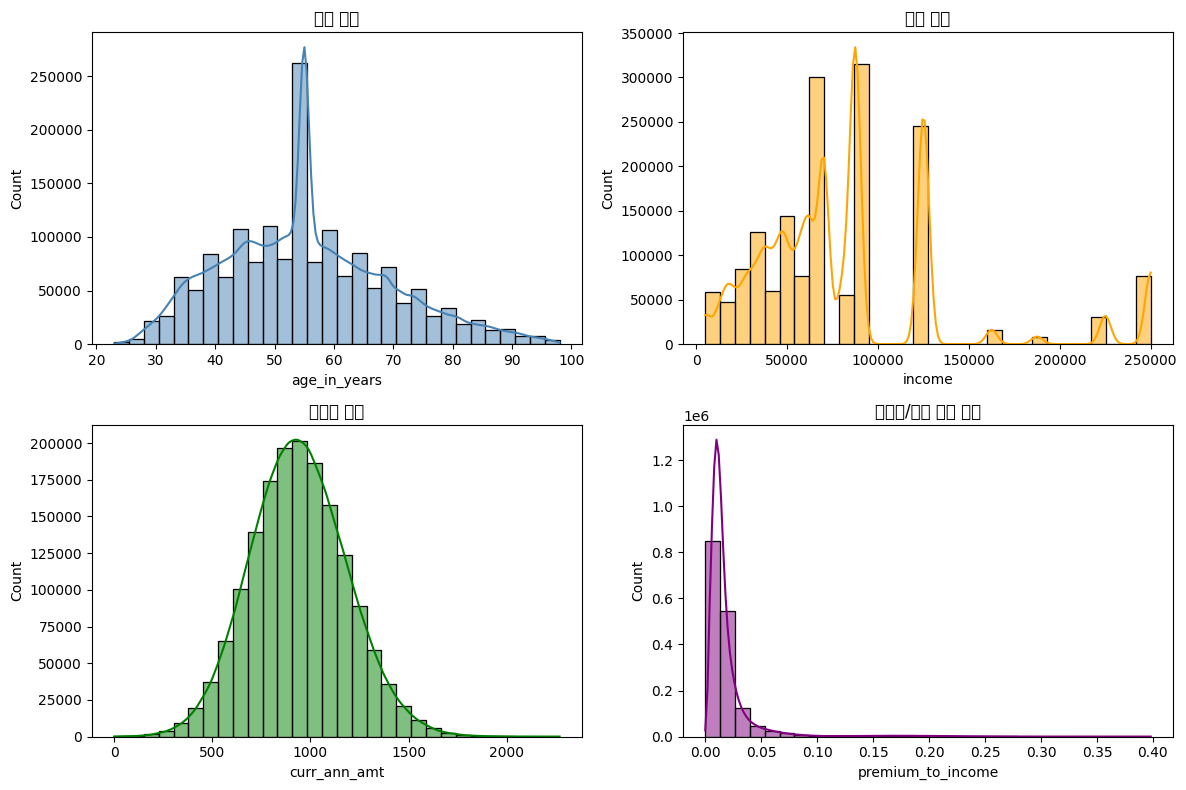

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not fo

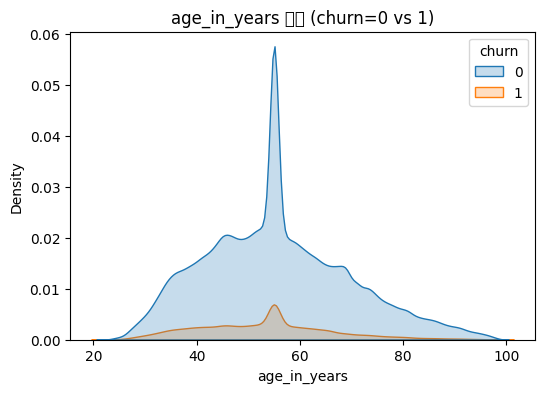

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\

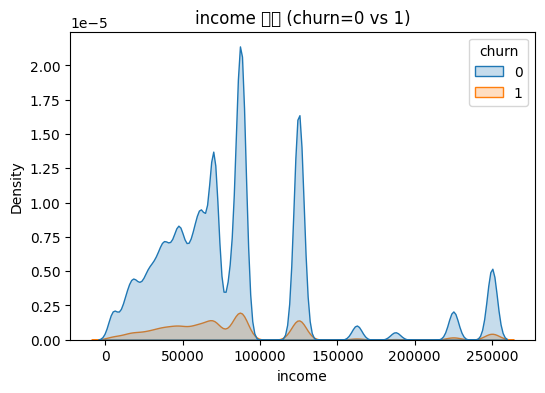

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

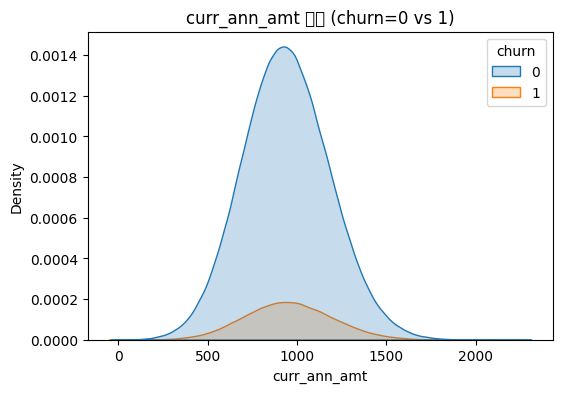

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not fo

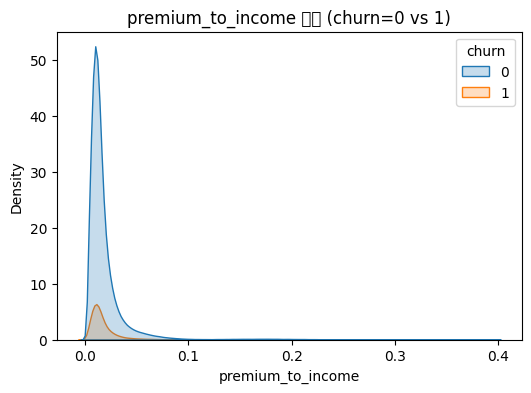

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Pytho

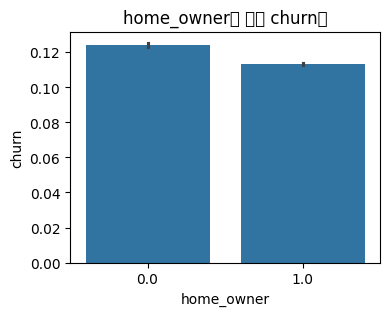

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Pytho

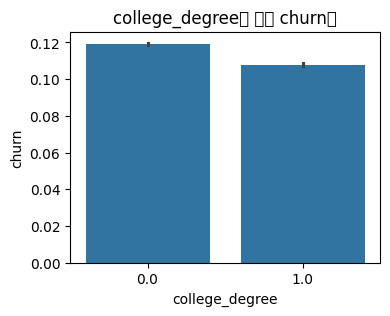

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Pytho

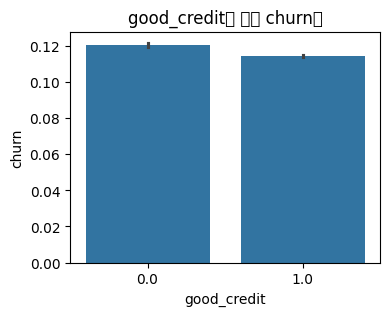

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Pytho

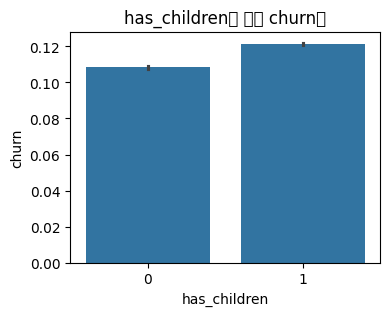

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

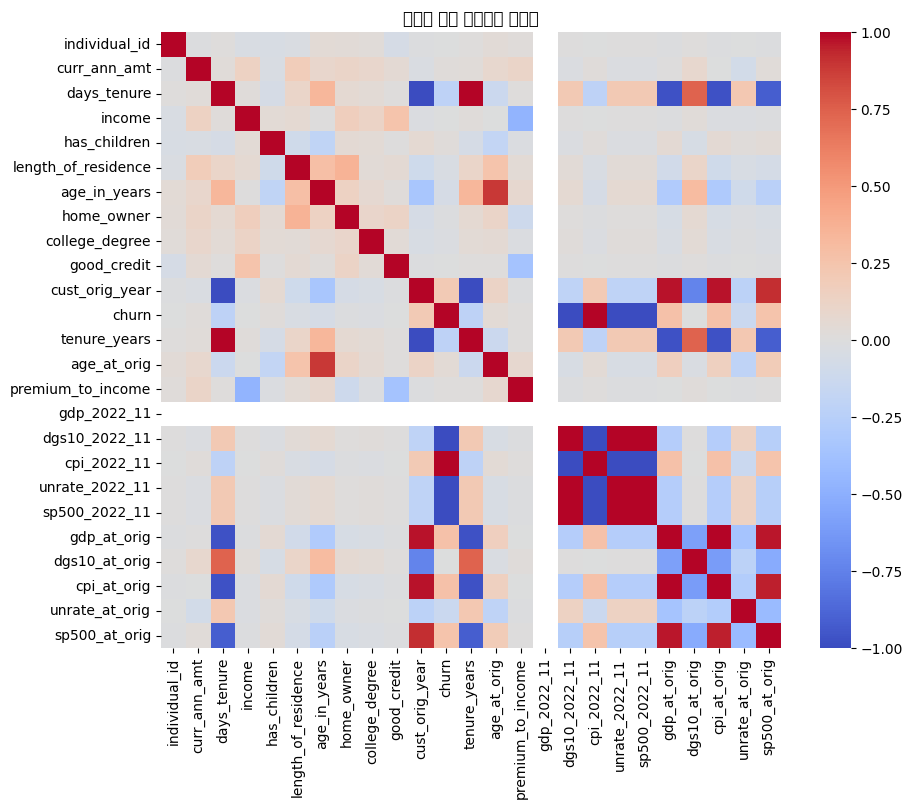

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 1️⃣ 기본 요약
# ----------------------------------------------------------
print(f"총 데이터 수: {len(df):,}")
print(f"결측치 개수:\n{df.isna().sum().sort_values(ascending=False).head(10)}")
print(f"\nchurn=1 비율: {df['churn'].mean()*100:.2f}%")

# ----------------------------------------------------------
# 2️⃣ 주요 변수별 분포 시각화
# ----------------------------------------------------------
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.histplot(df['age_in_years'], bins=30, kde=True, color='steelblue')
plt.title('연령 분포')

plt.subplot(2,2,2)
sns.histplot(df['income'], bins=30, kde=True, color='orange')
plt.title('소득 분포')

plt.subplot(2,2,3)
sns.histplot(df['curr_ann_amt'], bins=30, kde=True, color='green')
plt.title('보험료 분포')

plt.subplot(2,2,4)
sns.histplot(df['premium_to_income'], bins=30, kde=True, color='purple')
plt.title('보험료/소득 비율 분포')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 3️⃣ churn 그룹별 주요 변수 비교
# ----------------------------------------------------------
compare_cols = ['age_in_years', 'income', 'curr_ann_amt', 'premium_to_income']

for col in compare_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='churn', fill=True)
    plt.title(f'{col} 분포 (churn=0 vs 1)')
    plt.show()

# ----------------------------------------------------------
# 4️⃣ 범주형 변수 분포 비교
# ----------------------------------------------------------
cat_cols = ['home_owner', 'college_degree', 'good_credit', 'has_children']

for col in cat_cols:
    plt.figure(figsize=(4,3))
    sns.barplot(x=col, y='churn', data=df, estimator='mean')
    plt.title(f'{col}별 평균 churn율')
    plt.show()

# ----------------------------------------------------------
# 5️⃣ 상관관계 히트맵 (수치형만)
# ----------------------------------------------------------
num_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', center=0)
plt.title('수치형 변수 상관관계 히트맵')
plt.show()


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

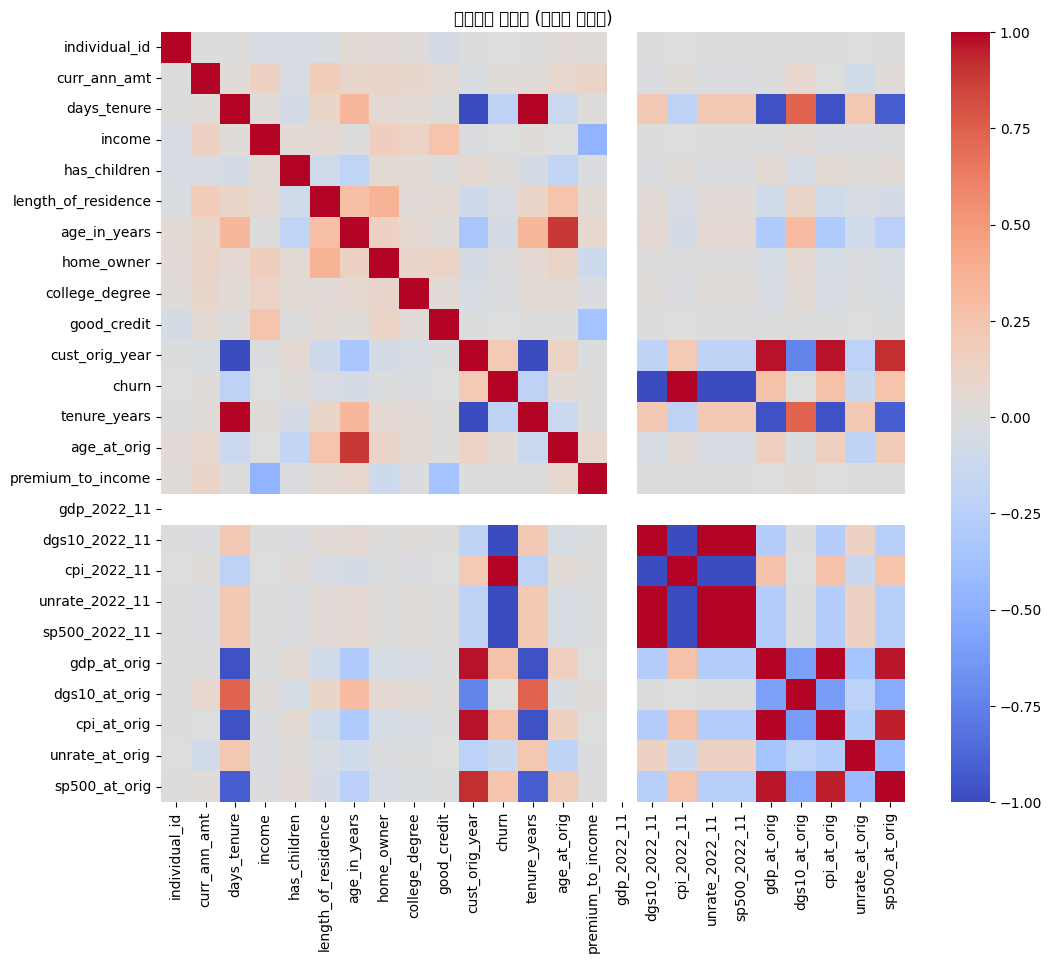

c:\Users\qkrrl\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


🔎 다중공선성 (VIF>10 이면 주의)

               variable          VIF
2           days_tenure          inf
17       unrate_2022_11          inf
15        dgs10_2022_11          inf
18        sp500_2022_11          inf
16          cpi_2022_11          inf
11         tenure_years          inf
6          age_in_years  1003.910705
12          age_at_orig   899.698155
10       cust_orig_year   784.056932
19          gdp_at_orig   645.464056
21          cpi_at_orig   288.425470
23        sp500_at_orig    33.205161
20        dgs10_at_orig     6.884561
22       unrate_at_orig     3.894691
13    premium_to_income     1.485518
3                income     1.387724
5   length_of_residence     1.273650
7            home_owner     1.214583
9           good_credit     1.184017
1          curr_ann_amt     1.120281


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ----------------------------------------------------------
# 1️⃣ 다중공선성 확인 (VIF)
# ----------------------------------------------------------
# 결측치 처리
df_vif = df[num_cols].copy()
df_vif = df_vif.fillna(df_vif.mean())

# churn 제외
X_vif = df_vif.drop(columns=['churn'], errors='ignore')

vif_df = pd.DataFrame()
vif_df['variable'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("🔎 다중공선성 (VIF>10 이면 주의)\n")
print(vif_df.sort_values('VIF', ascending=False).head(20))

In [40]:
from sklearn.model_selection import train_test_split

# ----------------------------------------------------------
# 1️⃣ 타깃 변수 지정
# ----------------------------------------------------------
target = 'churn'  # 종속변수 이름
y = df[target]
X = df.drop(columns=[target])

# ----------------------------------------------------------
# 2️⃣ Train (70%) vs Temp (30%)
# ----------------------------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,            # 나머지 30%는 valid+test
    stratify=y,               # churn 비율 유지
    random_state=42           # 재현성 확보
)

# ----------------------------------------------------------
# 3️⃣ Validation (15%) vs Test (15%)
# ----------------------------------------------------------
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,            # temp(30%)을 반반 나눔 → 각각 15%
    stratify=y_temp,
    random_state=42
)

# ----------------------------------------------------------
# 4️⃣ 결과 확인
# ----------------------------------------------------------
print("✅ 데이터 분할 완료")
print(f"Train : {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Valid : {len(X_valid):,} ({len(X_valid)/len(df)*100:.1f}%)")
print(f"Test  : {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)")

# 층화추출이 잘 적용되었는지 확인
print("\n📊 churn 비율")
print(f"Train : {y_train.mean():.4f}")
print(f"Valid : {y_valid.mean():.4f}")
print(f"Test  : {y_test.mean():.4f}")


✅ 데이터 분할 완료
Train : 1,149,394 (70.0%)
Valid : 246,299 (15.0%)
Test  : 246,299 (15.0%)

📊 churn 비율
Train : 0.1153
Valid : 0.1153
Test  : 0.1153


# 이거 X_train 데이터가지고 XGBoost 쉬운모델하나만 만들어줘